In [11]:
import pandas as pd

df = pd.read_csv('data/data_cleaned_twice.csv', index_col=0)
df = df.drop(columns=['student_id', 'name', 'is_female'])
df.head()

,class,gpa,is_greek,is_on_campus,distance_to_campus,is_sprinklered,claim_id,risk_tier,holdout,Business,Humanities,Other,Science,amount
3,3,1.203913,0,0,0.000000,1,0,2,0,0,1,0,0,0.0
7,3,0.609616,0,0,0.000000,1,0,2,0,0,0,0,1,0.0
11,3,3.073385,0,1,0.223942,0,0,2,0,1,0,0,0,0.0
15,4,3.224736,0,0,0.000000,0,0,3,0,1,0,0,0,0.0
19,2,2.687851,0,0,0.000000,0,0,1,0,1,0,0,0,0.0


In [12]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Define the features and target variable
X = df.drop(columns=['amount','risk_tier'])
y = df['risk_tier']

# Initialize and fit the model
model = GradientBoostingRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
0,class,1.000000e+00
1,gpa,2.223030e-14
6,claim_id,4.741296e-16
2,is_greek,0.000000e+00
3,is_on_campus,0.000000e+00
7,holdout,0.000000e+00
8,Business,0.000000e+00
9,Humanities,0.000000e+00
10,Other,0.000000e+00
11,Science,0.000000e+00


In [13]:
import pickle

# save
with open('GBR.pkl','wb') as f:
    pickle.dump(model,f)

In [14]:
feature_importances['feature']

KeyError: 'feature'

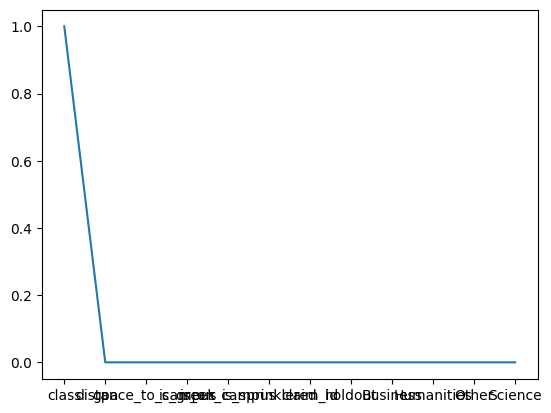

In [ ]:
import matplotlib.pyplot as plt

plt.plot(feature_importances['Feature'], feature_importances['Importance'])

<Axes: xlabel='Importance', ylabel='Feature'>

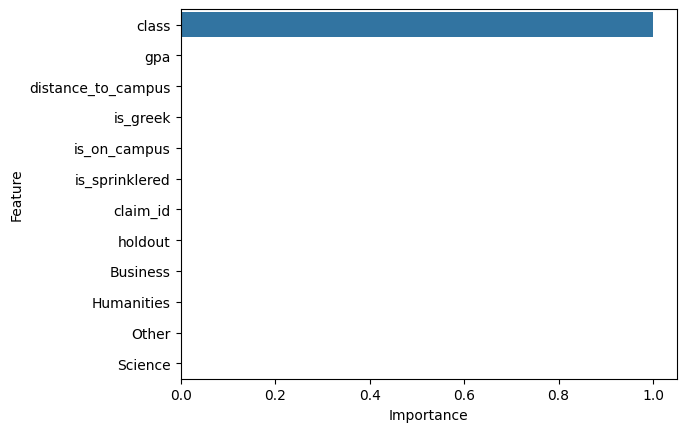

In [ ]:
import seaborn as sns

sns.barplot(x='Importance', y='Feature', data=feature_importances)